In [1]:
import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sys

sys.path.append('/home/rosedj1/DarkZ-EvtGeneration/CMSSW_9_4_2/src/DarkZ-EvtGeneration/LHE_Analyzer/Acceptance_Studies/')

from Acceptance_Utils.acceptance_fns import getUncertOfFractionPoisson, getUncertOfFractionBinomial

%matplotlib inline

Welcome to JupyROOT 6.10/09


# Acceptance of ALP vs. Zdark Models

In [2]:
def calc_accept_from_process(list_elem):
    n_evts_in_fid_vol = float(list_elem.split()[3])
    acc = n_evts_in_fid_vol / n_evts_total * 100.
    
    acc_err_poisson = getUncertOfFractionPoisson(n_evts_in_fid_vol, n_evts_total) * 100.
    acc_err_binomial = getUncertOfFractionBinomial(n_evts_in_fid_vol, n_evts_total) * 100.
    
    return n_evts_in_fid_vol, acc, acc_err_poisson, acc_err_binomial

def calc_x_err_bins(x_val_center_list):
    """
    Returns lists of the x-errors, which may be symmetrical or asymmetrical. 
    """
    high_err_list = []
    for x_center in range(len(x_val_center_list)-1):
        high_err = float( x_val_center_list[x_center+1] - x_val_center_list[x_center] ) / 2
        high_err_list.append(high_err)
        
    low_err_list = [high_err_list[0]] + high_err_list
    high_err_list = high_err_list + [high_err_list[-1]]
    
    return low_err_list, high_err_list

In [3]:
infile = '/home/rosedj1/DarkZ-EvtGeneration/CMSSW_9_4_2/src/DarkZ-EvtGeneration/LHE_Analyzer/LHE_Skimmer/nevents_from_ZZD_LHEskim/acceptancevals.txt'
verbose = False

n_evts_total = 10000.0
mass_pts = [4,5,7,10,15,20,25,30,32,33]

with open(infile, 'r') as f:
    data = f.readlines()

In [4]:
hTOalpalpTO4mu_acc_list = []
hTOalpalpTO4mu_acc_err_list = []
hTOzpzpTO4mu_acc_list = []
hTOzpzpTO4mu_acc_err_list = []
hTOzalpTO4mu_acc_list = []
hTOzalpTO4mu_acc_err_list = []
hTOzzpTO4mu_acc_list = []
hTOzzpTO4mu_acc_err_list = []

if (verbose): print "Found data:\n", data

for proc in data:
    # Sort through processes.
    n_evts_fiducial, acc, acc_err_poiss, acc_err_binom = calc_accept_from_process(proc)
    if 'hTOalpalpTO4mu' in proc:
        hTOalpalpTO4mu_acc_list.append(acc)
        hTOalpalpTO4mu_acc_err_list.append(acc_err_binom)
    elif 'hTOzpzpTO4mu' in proc:
        hTOzpzpTO4mu_acc_list.append(acc)
        hTOzpzpTO4mu_acc_err_list.append(acc_err_binom)
    elif 'hTOzalpTO4mu' in proc:
        hTOzalpTO4mu_acc_list.append(acc)
        hTOzalpTO4mu_acc_err_list.append(acc_err_binom)        
    elif 'hTOzzpTO4mu' in proc:
        hTOzzpTO4mu_acc_list.append(acc)
        hTOzzpTO4mu_acc_err_list.append(acc_err_binom)            
    else:
        raise RuntimeError("Process not recognized.")

# print "mass_pts:", mass_pts
# print hTOalpalpTO4mu_acc_list
# print hTOalpalpTO4mu_acc_err_list
# print hTOzpzpTO4mu_acc_list
# print hTOzpzpTO4mu_acc_err_list
# print hTOzalpTO4mu_acc_list
# print hTOzalpTO4mu_acc_err_list
# print hTOzzpTO4mu_acc_list
# print hTOzzpTO4mu_acc_err_list

In [10]:
def make_acceptance_plot(mass_list,
                         acc_ZD, acc_err_ZD, leg_label_ZD,
                         acc_ALP, acc_err_ALP, leg_label_ALP,
                         save_plots=False):

    font_size_leg = 20
    font_size_axes = 30
    font_size_title = 38

    small=10
    medium=20
    large=40
    # extralarge=60

    fig = plt.figure(figsize=(10,8)) 
    ax = fig.add_axes([0,0.30,1,0.74])  # [low_left_corner_x, low_left_corner_y, width, height]
    ax_ratio = fig.add_axes([0,0,1,0.295])

    al=1  # alpha=0 is transparent
    elw=2  # error bar line width
    ecolor='k'
    ms=small  # marker size
    mec='k'  # marker edge color
    cs=4  # cap size
    mew=1  # marker edge width

    #ax.set_xlabel('$m\ $' + "(of a or " + r'$Z_D$' + ")" + '$\ [GeV]$')
    # ax_ratio.set_xlabel('$m_{Z_D}$' + 'or' + 'm_a \ [GeV]$')
    ax_ratio.set_xlabel(r'$m_{X} \ (X = Z_{D},a) \ [GeV]$')
    ax_ratio.set_ylabel(r'$\frac{ (a - Z_{D}) }{ Z_{D} }$')
    ax.set_ylabel('$A_{fid}\ [\%]$')
    ax.set_title('Fiducial Acceptance, ALP Model vs. HAHM')

    ax.set_xlim([0,35])
    ax_ratio.set_xlim([0,35])

    ax.set_ylim([21,80])
    ax_ratio.set_ylim([-0.5, 0.5])

    # # We change the fontsize of minor ticks label (like the numbers on the axis)
    ax.tick_params(axis='both', labelsize=medium, which='both')
    ax_ratio.tick_params(axis='both', labelsize=medium)

    # Hide main plot's x tick labels.
    plt.setp(ax.get_xticklabels(), visible=False)

    plt.minorticks_on()
    plt.rc('font', size=font_size_axes)          # controls default text sizes
    plt.rc('axes', titlesize=font_size_axes)     # fontsize of the axes title
    plt.rc('axes', labelsize=font_size_axes)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=large)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=large)    # fontsize of the tick labels
    plt.rc('legend', fontsize=medium)    # legend fontsize
    plt.rc('figure', titlesize=large)  # fontsize of the figure title

    # Gridlines.
    ax.grid(which='major',color='k')
    ax_ratio.grid(which='major',axis='x')
    ax_ratio.grid(which='major',axis='y', ls='-')
    ax_ratio.grid(which='minor',axis='y')

    # Hide first tick label on y-axis, since it overlaps with ratio plot's tick label.
    a=ax.get_yticks().tolist()
    a[0]=''
    ax.set_yticklabels(a)

    # Only show a few of the tick labels on ratio plot.
    n_tick_labels = 5
    ax_ratio.yaxis.set_major_locator(plt.MaxNLocator(n_tick_labels))

    ax_ratio.axhline(c='r', lw=3)

    # Find x error bars, which may be asymmetrical.
    low_x_err, high_x_err = calc_x_err_bins(mass_list)
    
    # Calculate %diff for ratio plot.
    acc_ZD_arr = np.array(acc_ZD, dtype=float)
    acc_ALP_arr = np.array(acc_ALP, dtype=float)
    acc_perc_diff_arr = (acc_ALP_arr - acc_ZD_arr) / acc_ZD_arr
 
    # Calculate errors on %diff.
    acc_perc_diff_err_arr = getUncertOfFractionBinomial(acc_ALP_arr, acc_ZD_arr)
    
    # Plot the data.
    ax.errorbar(mass_list, acc_ZD, xerr=[low_x_err, high_x_err], yerr=acc_err_ZD, fmt='o',label=leg_label_ZD, color='b', elinewidth=elw, ms=ms, markeredgecolor=mec, capsize=cs, mew=mew, ecolor=ecolor)
    ax.errorbar(mass_list, acc_ALP, xerr=[low_x_err, high_x_err], yerr=acc_err_ALP, fmt='o',label=leg_label_ALP, color='r', elinewidth=elw, ms=ms, markeredgecolor=mec, capsize=cs, mew=mew, ecolor=ecolor)

    ax_ratio.errorbar(mass_list, acc_perc_diff_arr, xerr=[low_x_err, high_x_err], yerr=acc_perc_diff_err_arr, fmt='o', color='k', elinewidth=elw, ms=ms, markeredgecolor=mec, capsize=cs, mew=mew, ecolor=ecolor)
    
    ax.legend()
    plt.show()
    if (save_plots):
        if 'Z_DZ_D' in leg_label_ZD: 
            plotname = 'acc_ALPvsHAHM_zalp_vs_zzd'
        elif 'ZZ_D' in leg_label_ZD:
            plotname = 'acc_ALPvsHAHM_alpalp_vs_zdzd'
        else:
            raise RuntimeError("PLOT NOT SAVED! leg_label_ZD didn't contain key words.")
        outpath = '/home/rosedj1/public_html/DarkZ/ALPvsDarkZ_acceptance/'
        plt.savefig(outpath + plotname + '.pdf')
        plt.savefig(outpath + plotname + '.png')
        print "Plot saved in:\n", outpath 

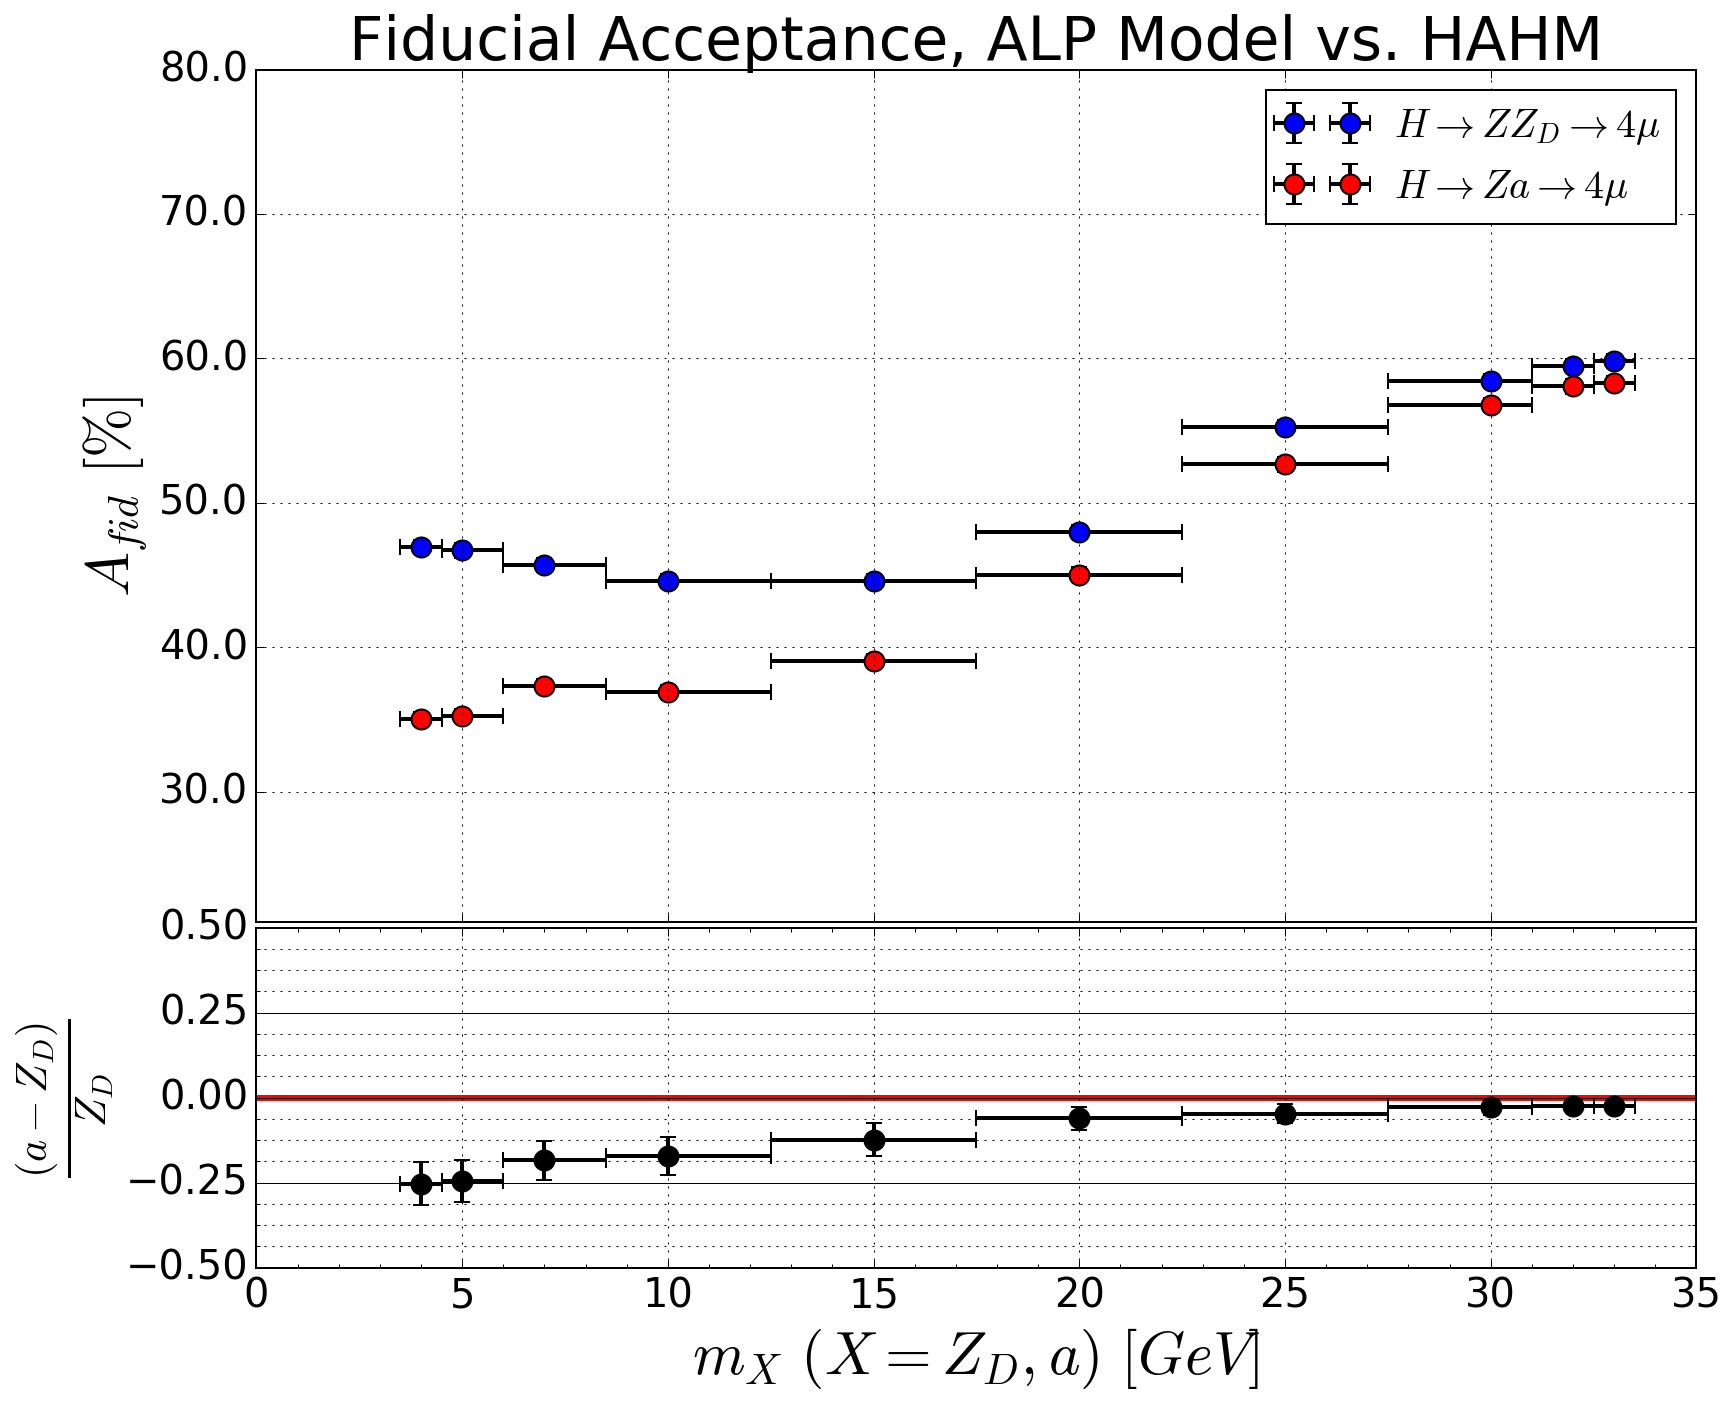

Plot saved in:
/home/rosedj1/public_html/DarkZ/ALPvsDarkZ_acceptance/


In [12]:
%config InlineBackend.figure_format ='retina'

make_acceptance_plot(mass_pts,
                     hTOzpzpTO4mu_acc_list, hTOzpzpTO4mu_acc_err_list, r'$H \rightarrow Z_DZ_D \rightarrow 4\mu$',
                     hTOalpalpTO4mu_acc_list, hTOalpalpTO4mu_acc_err_list, r'$H \rightarrow aa \rightarrow 4\mu$',
                     save_plots=True)

make_acceptance_plot(mass_pts,
                     hTOzzpTO4mu_acc_list, hTOzzpTO4mu_acc_err_list, r'$H \rightarrow ZZ_D \rightarrow 4\mu$',
                     hTOzalpTO4mu_acc_list, hTOzalpTO4mu_acc_err_list, r'$H \rightarrow Za \rightarrow 4\mu$',
                     save_plots=True)

## alpalp vs. zdzd

In [ ]:
#fig,ax = plt.subplots()

scalefact = 20
small=10
medium=16
large=10

fig = plt.figure(figsize=(10,8)) 
ax = fig.add_axes([1,1,1,1])

al=0.7
elw=5
ms=small
mec='k'
cs=3

ax.errorbar(mass_pts, halpalp4mu, yerr=halpalp4mu_err, fmt='s',label=r'$H \rightarrow aa \rightarrow 4\mu$',color='b',alpha=al,elinewidth=elw,ms=ms,markeredgecolor=mec,capsize=cs)
ax.errorbar(mass_pts, hzdzd4mu,  yerr=hzdzd4mu_err, fmt='^',label=r'$H \rightarrow Z_DZ_D \rightarrow 4\mu$',color='r',alpha=al,elinewidth=elw,ms=ms,markeredgecolor=mec,capsize=cs)

#ax.set_xlabel('$m\ $' + "(of a or " + r'$Z_D$' + ")" + '$\ [GeV]$')
ax.set_xlabel('$m_{Z_D}\ or\ m_a \ [GeV]$')
ax.set_ylabel('$A_{fid}\ [\%]$')
ax.set_title('Acceptances for ALP vs. HAHM')

ax.set_ylim([0,100])
ax.tick_params(axis='both', labelsize=medium)
#ax.tick_params(axis='y', labelsize=medium)

plt.minorticks_on()
plt.rc('font', size=large)          # controls default text sizes
plt.rc('axes', titlesize=large)     # fontsize of the axes title
plt.rc('axes', labelsize=large)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=large)    # fontsize of the tick labels
plt.rc('ytick', labelsize=large)    # fontsize of the tick labels
plt.rc('legend', fontsize=medium)    # legend fontsize
plt.rc('figure', titlesize=large)  # fontsize of the figure title
ax.grid(which='major',color='k')
ax.grid(which='minor',color='k',ls='--',axis='y')

# x = fig.add_subplot(111)

# # We change the fontsize of minor ticks label 
# ax.tick_params(axis='both', which='major', labelsize=10)
# ax.tick_params(axis='both', which='minor', labelsize=8)


ax.legend()
plt.show()
#plt.savefig('acc_ALPvsHAHM_alpalp_vs_zdzd.pdf')
#plt.savefig('testplot.png')

#fig,ax = plt.subplots()

In [ ]:
scalefact = 20
small=10
medium=16
large=70

fig = plt.figure(figsize=(10,8)) 
ax = fig.add_axes([1,1,1,1])

al=0.7
elw=5
ms=small
mec='k'
cs=3

ax.errorbar(mass_pts, hzalp4mu, yerr=hzalp4mu_err, fmt='s',label=r'$H \rightarrow Za \rightarrow 4\mu$',color='b',alpha=al,elinewidth=elw,ms=ms,markeredgecolor=mec,capsize=cs)
ax.errorbar(mass_pts, hzzd4mu,  yerr=hzzd4mu_err, fmt='^',label=r'$H \rightarrow ZZ_D \rightarrow 4\mu$',color='r',alpha=al,elinewidth=elw,ms=ms,markeredgecolor=mec,capsize=cs)

#ax.set_xlabel('$m\ $' + "(of a or " + r'$Z_D$' + ")" + '$\ [GeV]$')
ax.set_xlabel('$m_{Z_D}\ or\ m_a \ [GeV]$')
ax.set_ylabel('$A_{fid}\ [\%]$')
ax.set_title('Acceptances for ALP vs. HAHM')

ax.set_ylim([0,100])
ax.tick_params(axis='both', labelsize=medium)
#ax.tick_params(axis='y', labelsize=medium)

plt.minorticks_on()
plt.rc('font', size=large)          # controls default text sizes
plt.rc('axes', titlesize=large)     # fontsize of the axes title
plt.rc('axes', labelsize=large)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=large)    # fontsize of the tick labels
plt.rc('ytick', labelsize=large)    # fontsize of the tick labels
plt.rc('legend', fontsize=medium)    # legend fontsize
plt.rc('figure', titlesize=large)  # fontsize of the figure title
ax.grid(which='major',color='k')
ax.grid(which='minor',color='k',ls='--',axis='y')

# x = fig.add_subplot(111)

# # We change the fontsize of minor ticks label 
# ax.tick_params(axis='both', which='major', labelsize=10)
# ax.tick_params(axis='both', which='minor', labelsize=8)


ax.legend()
plt.show()
plt.savefig('acc_ALPvsHAHM_zalp_vs_zzd.pdf')

#plt.savefig('testplot.png')

## Most likely delete below:

In [ ]:
halpalp4mu = [
44.5800,   
44.7000,  
44.5700,  
44.1600,  
42.4600,  
42.7600,  
43.7400,  
47.0100]  

halpalp4mu_err = [
0.8028310158,
0.8042443658,
0.8027132053,
0.7978787878,
0.7777436339,
0.7813077243,
0.7929178772,
0.8313206421]

hzalp4mu = [
35.0800,   
35.2600,  
37.3000,  
36.9300,  
39.0900,  
45.0500,  
52.6700,  
56.7600]  

hzalp4mu_err = [
0.6883753627,
0.6905988416,
0.7156318886,
0.7111135563,
0.7373620617,
0.8083626971,
0.8967234189,
0.9432760784]

hzdzd4mu = [
61.6900,   
61.2200,  
59.7700,  
59.0100, 
57.4100,  
56.7900, 
56.2400,  
55.8400]  

hzdzd4mu_err = [
0.9987320011,
0.9934731199,
0.9772130218,
0.968668163,
0.9506265355,
0.943615605,
0.9373866651,
0.9328507705]

hzzd4mu = [
46.9700, 
46.7200, 
45.6900, 
44.6200, 
44.5800, 
47.9800, 
55.2600, 
58.4300]

hzzd4mu_err = [ 
0.8308538319,
0.8279346834,
0.8158784284,
0.8033022096,
0.8028310158,
0.8426197482,
0.9262649513,
0.9621364196]

# Using DataFrames:

In [ ]:
df1 = pd.read_table("branchratio_MZd.txt")
df2 = pd.read_table("branchratiotable.txt")

epsilon = 0.01
 
df1['Br(h-->ZdZ-->4l)'] *= epsilon**2
df2

x = df2['Mass']
y1 = df2['BrZll']
y2 = df2['BrZZd4l']

fontsize = '25'
#labelpad = 10

#fig = plt.figure(figsize=(12,8))
#fig = plt.figure(figsize=(8,4))
#fig = plt.figure()
#fig, axes1 = plt.subplots()
#fig, (axes1,axes2) = plt.subplots(1,2)
#fig.set_size_inches(8,6)

fig = plt.figure(figsize=(20,8))
# axes1 = fig.add_subplot(121)
# axes2 = fig.add_subplot(122)
axes1 = fig.add_axes([0, 0, 0.45, 1])
axes2 = fig.add_axes([0.55, 0, 0.45, 1])

#axes1.set_xlabel("%s (GeV)" % xLabel, fontsize=fontsize, labelpad=labelpad)
#axes1.set_ylabel("%s" % y1Label, fontsize=fontsize, labelpad=labelpad)
axes1.set_xlabel(r'$m_{Z_d} \ [GeV]$', fontsize=fontsize)
axes1.set_ylabel(r'$Br(Z_d \rightarrow \ell\ell)$', fontsize=fontsize)
axes1.tick_params(labelsize=fontsize)

axes2.set_xlabel(r'$m_{Z_d} \ [GeV]$', fontsize=fontsize)
axes2.set_ylabel(r'$Br(h \rightarrow Z_dZ \rightarrow 4\ell)\ /\ \epsilon^2$', fontsize=fontsize)
axes2.tick_params(labelsize=fontsize)

# axes1.set_title("%s vs %s" % (y1Label, xLabel), fontsize=fontsize, pad=labelpad)
#axes1.set_title("%s vs %s" % (y1Label, xLabel), fontsize=fontsize)
#axes2.set_title("%s vs %s" % (y2Label, xLabel), fontsize=fontsize)

axes1.grid(True,which='both')
axes2.grid(True,which='both')
#plt.plot(x,y)
#axes1.set_xlim([1,65])
#plt.xscale('log')
# locs, labels = plt.xticks()
# print locs, labels
# print len(locs)
# print len(labels)
plt.minorticks_on()
axes1.plot(x,y1,marker='.',color='b')
plt.minorticks_on()
axes2.plot(x,y2,marker='.',color='b')

#plt.tight_layout()

#plt.savefig("branching_ratios_plot.pdf", dpi = 100)

In [ ]:
df_acc_vals = pd.read_table('alpvszdark_xs_vals_4to30GeV.txt', names=['process','mass','xs'])
df_acc_vals